In [56]:
import os
import shutil

from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import backend as K

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#Folder creation

original_dataset_dir = "./Datasets/DogsCats"

base_dir = "./Datasets/Processed"
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, "validation")
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, "test")
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, "dogs")
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, "dogs")
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, "dogs")
os.mkdir(test_dogs_dir)

In [14]:
#Data distribution to folders

original_dataset_dir = "./Datasets/DogsCats/train"

fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
print("Total training cat images: {}".format(len(os.listdir(train_cats_dir))))
print("Total training dog images: {}".format(len(os.listdir(train_dogs_dir))))
print("Total validation cat images: {}".format(len(os.listdir(validation_cats_dir))))
print("Total validation dog images: {}".format(len(os.listdir(validation_dogs_dir))))
print("Total test cat images: {}".format(len(os.listdir(test_cats_dir))))
print("Total test dog images: {}".format(len(os.listdir(test_dogs_dir))))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
Total test cat images: 500
Total test dog images: 500


In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [24]:
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode="binary")

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=(150, 150),
                                                         batch_size=20,
                                                         class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 91s 909ms/step - loss: 0.6865 - acc: 0.5440 - val_loss: 0.6778 - val_acc: 0.5770
Epoch 2/30
100/100 [==============================] - 89s 889ms/step - loss: 0.6354 - acc: 0.6380 - val_loss: 0.6622 - val_acc: 0.6530
Epoch 3/30
100/100 [==============================] - 91s 909ms/step - loss: 0.5836 - acc: 0.6955 - val_loss: 0.7432 - val_acc: 0.6370
Epoch 4/30
100/100 [==============================] - 87s 866ms/step - loss: 0.5495 - acc: 0.7090 - val_loss: 0.6134 - val_acc: 0.6830
Epoch 5/30
100/100 [==============================] - 90s 898ms/step - loss: 0.5221 - acc: 0.7340 - val_loss: 0.3817 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 90s 897ms/step - loss: 0.4975 - acc: 0.7600 - val_loss: 0.4879 - val_acc: 0.6920
Epoch 7/30
100/100 [==============================] - 88s 880ms/step - loss: 0.4721 - acc: 0.7700 - val_loss: 0.5945 - val_acc: 0.6980
Epoch 8/30
100/100 [==============================] - 8

In [27]:
model.save("cats_dogs_model.h5")

In [31]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

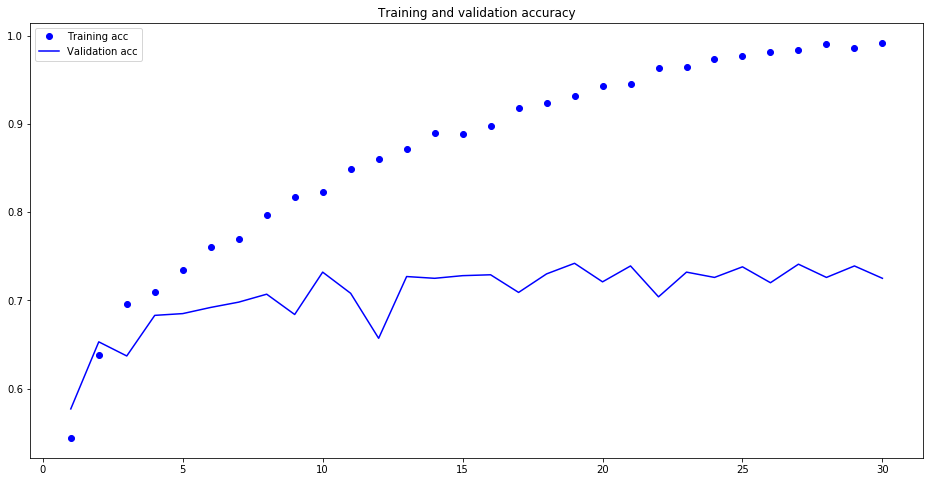

In [34]:
plt.figure(figsize=(16,8))
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

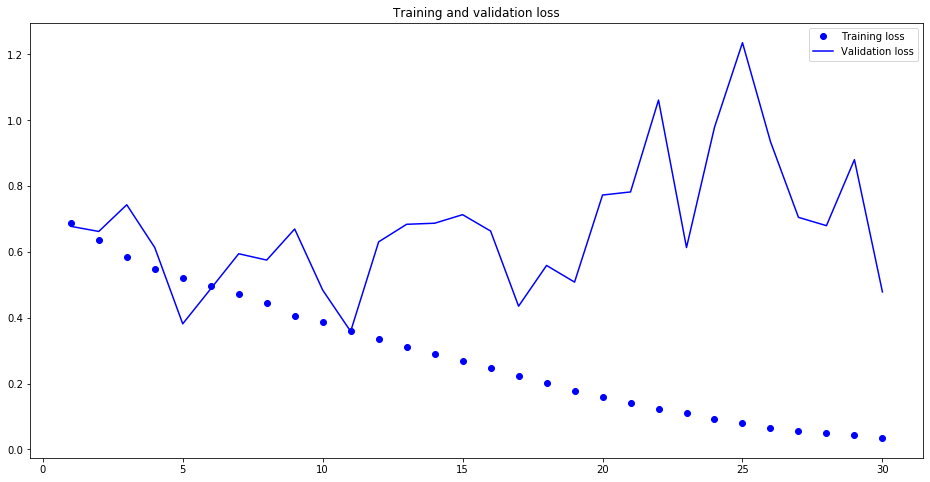

In [36]:
plt.figure(figsize=(16,8))
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

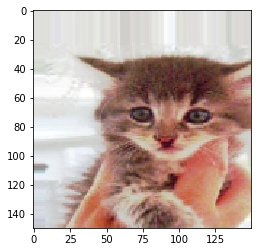

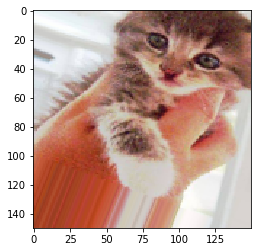

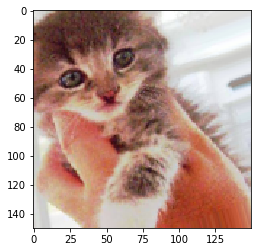

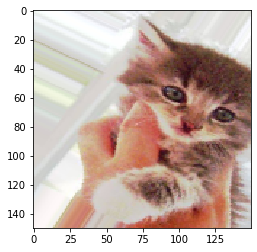

In [42]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode="nearest")

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])

In [44]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [61]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 153s 2s/step - loss: 0.4388 - acc: 0.7907 - val_loss: 0.3802 - val_acc: 0.7836
Epoch 2/100
100/100 [==============================] - 149s 1s/step - loss: 0.4367 - acc: 0.7962 - val_loss: 0.5706 - val_acc: 0.7732
Epoch 3/100
100/100 [==============================] - 148s 1s/step - loss: 0.4306 - acc: 0.7996 - val_loss: 0.5916 - val_acc: 0.7868
Epoch 4/100
100/100 [==============================] - 166s 2s/step - loss: 0.4244 - acc: 0.8021 - val_loss: 0.3927 - val_acc: 0.8144
Epoch 5/100
100/100 [==============================] - 186s 2s/step - loss: 0.4298 - acc: 0.7945 - val_loss: 0.4886 - val_acc: 0.8058
Epoch 6/100
100/100 [==============================] - 179s 2s/step - loss: 0.4158 - acc: 0.8037 - val_loss: 0.2892 - val_acc: 0.7951
Epoch 7/100
100/100 [==============================] - 171s 2s/step - loss: 0.4296 - acc: 0.8028 - val_loss: 0.4056 - val_acc: 0.7931
Epoch 8/100
100/100 [==============================] - 162s 2s

Epoch 62/100
100/100 [==============================] - 149s 1s/step - loss: 0.3158 - acc: 0.8652 - val_loss: 0.4930 - val_acc: 0.8433
Epoch 63/100
100/100 [==============================] - 148s 1s/step - loss: 0.3062 - acc: 0.8706 - val_loss: 0.4214 - val_acc: 0.8003
Epoch 64/100
100/100 [==============================] - 155s 2s/step - loss: 0.3203 - acc: 0.8605 - val_loss: 0.8080 - val_acc: 0.7732
Epoch 65/100
100/100 [==============================] - 150s 2s/step - loss: 0.2978 - acc: 0.8737 - val_loss: 0.4530 - val_acc: 0.8299
Epoch 66/100
100/100 [==============================] - 150s 1s/step - loss: 0.2963 - acc: 0.8775 - val_loss: 0.2739 - val_acc: 0.8351
Epoch 67/100
100/100 [==============================] - 149s 1s/step - loss: 0.3174 - acc: 0.8653 - val_loss: 0.5412 - val_acc: 0.8350
Epoch 68/100
100/100 [==============================] - 146s 1s/step - loss: 0.3004 - acc: 0.8718 - val_loss: 0.5009 - val_acc: 0.8209
Epoch 69/100
100/100 [==============================] -

In [62]:
model.save("cats_dogs_small_02.h5")

In [63]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

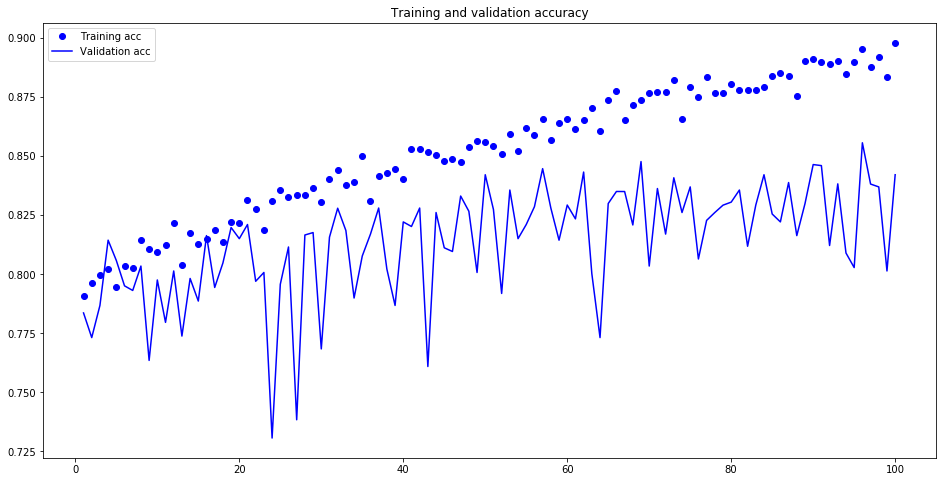

In [64]:
plt.figure(figsize=(16,8))
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

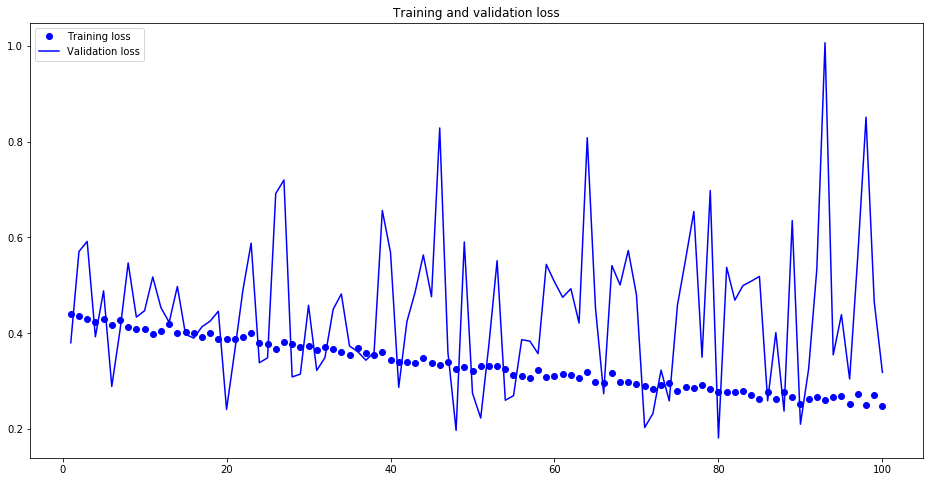

In [65]:
plt.figure(figsize=(16,8))
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()